<div>
<p style="font-size:22pt;text-align:center;font-style:normal; font-weight: bold; font-family:Times New Roman;line-height:30pt;">
    Os Atratores de Lorenz: Uma análise numérica 
</p>

<div style="background-color:#ffffff; text-align:center; font-family:Times New Roman; text-size:18pt; font-size:14pt">
    <p style="text-align:center; text-size:18pt">
    Alcebiades Alves Barbosa Filho <br/>
       <i style="font-size:10pt">Universidade Federal de Goiás, Instituto de Física, Goiânia-GO, Brasil, <br>
       Física Computacional<br/>
       Fevereiro de 2020<br/></i>
    </p>
<div>

# Introdução

## Sistema caótico
Um sistema caótico se trata de um sistema complexo, dinâmico, deterministico e com sensibilidade as condições iniciais.

- **Sistema complexo**: Um sistema com um grande número de agentes interagentes que exibe comportamentos emergentes não triviais e auto organizados. 
- **Sistema dinâmico**: É um conceito no qual uma função descreve a relação no tempo de um ponto em um espaço geométrico
- **Sistema deterministico**: É um sistema no qual nenhuma aleatoriedade está envolvida no desenvolvimento de estados futuros do sistema. Um modelo determinístico, portanto, sempre produzirá a mesma saída de uma determinada condição inicial ou estado inicial.
- **sensibilidade as condições iniciais**: Um sistema caótico é sensivel as condições iniciais uma pequena variação na condição inicial produz resultados totalmente diferentes.

## Sistema dinâmico linear x Sistema dinâmico não linear


- **Sistema dinâmico linear**: Um sistema linear é uma das coisas mais bem comportadas que existem, uma variação nas condições iniciais gera uma variação da mesma porproção nos resultados e vale o principo da superposição( somas de resultados também será um resultado.

- **Sistema dinâmico não linear**:Um sistema dinâmico não linear é um sistema determinista, cujo comportamento futuro é previsível segundo a Teoria do Caos, se as condições iniciais do sistema forem perfeitamente conhecidas.



## O sistema de Lorenz 




   O sistema de Lorenz descreve a dinâmica de um fluido viscoso numa célula de Rayleigh-Bernard. As equações que descrevem o comportamento do fluido são aproximações para convecção, derivadas a partir das equações de momento e energia de Navier-Stokes.

   No modelo matemático de convecção de Lorenz, três estados variaram (x, y, z). A variável x é proporcional à amplitude da velocidade do fluido circulante no anel de fluido, representando no sentido horário (quando positivo) e anti-horário (quando negativo). A variável y é a diferença de temperatura entre os fluidos e a variável z é a
distorção da linearidade da temperatura vertical. 


$$ \begin{cases}
\frac{dx}{dt}= \alpha(y-x) \\
\frac{dy}{dt}=-xz + \rho x -y \\
\frac{dz}{dt}=xy - \beta z
\end{cases}
$$

   Em que  "α"  se chama o número de Prandtl e "ρ" se chama o número de Rayleigh.
E  α ; β; ρ > 0. 

   Desde a década de 1960, quando Lorenz apresentou a dependência sensível de soluções numéricas em condições iniciais  com equações governadas simplificadas que descrevem uma convecção dissipativa, bidimensional, forçada e de Rayleigh-Benard, é amplamente reconhecido que previsões meteorológicas determinísticas perfeitas são impossíveis. Em seu estudo de modelagem inovador, em que três modos espaciais de Fourier foram usados para representar a função de corrente e perturbações de temperatura da convecção, [Lorenz (1963a)](https://journals.ametsoc.org/doi/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2) mostrou que os resultados numéricos se tornam caóticos, com sensibilidades as condições iniciais, quando um número normalizado de Rayleigh "ρ" excede um número crítico ( por exemplo, ρc = 24,74 para um número Prandtl constante α= 10) Este modelo é referido como Atractor de Lorenz . Lorenz associou o comportamento caótico à inclusão da não linearidade já discutida acima.

## Objetivo 
Como percebemos esse sistema de EDO's não lineares não é algo tão simples de se resolver, por isso implementaremos um método numérico conhecido como método prededitor-corretor ou multistep, e especificadamente será usado o método de Adams-Bashforth de 4ª ordem como preditor e Adams-Moulton de 4ª ordem como corretor. 
E por um viés de comparação, também implementaremos o método numérico de Runge-Kutta de 4° ordem 

# Métodos Numéricos 

### Método Preditor de Adams-Bashforth

Seja o problema de valor inicial :

$$\begin{cases}
\frac{dy}{dt}=f(t,y)\\
y=y_0\\
t=t_0
\end{cases}
$$

Definindo F(t)=f(t,y) logo temos:

$$y_{i+1} - y_i = \int\limits_{t_i}^{t_i+1}F(x)\, dt\qquad(1)$$ 

A idéia do método preditor de Adams é considerar F(t) como sendo um polinômio interpolador no intervalo $
t_{i-1}\leq t \leq t_i$já que os valores de y nestes pontos são conhecidos.

Agora iremos realizar uma interpolação linear entre os pontos $t_{i-1}$  e  $t_i$ e tomando $t=t_{i-1}$ e $t=t_i$ , obtem-se:


$$\begin{cases}
F(t_{i-1})=at_{i-1} + b \\
F(t_{i})=at_{i} + b
\end{cases}$$


$$\downarrow$$

$$\begin{cases}
a= \frac{F(t_i)-F(t_{i-1})}{h}	 \\
b= \frac{F(t_{i-1})t_i-F(t_{i})t_{i-1}}{h}
\end{cases}$$


E sendo $h = t_i - t_{i-1}$ e logo nossa F(t) será : 

$$F(x)= \frac{t_i-t}{h} F(t_{i-1})+\frac{t-t_{i-1}}{h} F(t_{i-1})$$

Logo substituindo esse valor em (1) temos:

$$y_{i+1} - y_i = \int\limits_{t_i}^{t_i+1}\frac{t_i-t}{h} F(t_{i-1})\, dt + \int\limits_{t_i}^{t_i+1}\frac{t-t_{i-1}}{h} F(t_{i-1})\, dt$$

Para resolver essa integral deveremos fazer uma mudança de variável 

Se $$t=t_i + \gamma h , 0\leq \gamma \leq 1$$ 
Então:
$$f(n) =\begin{cases} 
\gamma = 0,  & \mbox{para }t=t_i \\
\gamma = 1,  & \mbox{para }t=t_{i+1}
\end{cases}$$

de onde 

$$ t_i-t =- \gamma h $$
$$   t_i-t_{i-1}=x_i+\gamma h -t_{i-1} = h + \gamma h = (1 + \gamma )h$$
$$   dt=hd\gamma $$


E então substituindo os valores chegaremos em 

$$y_{i+1} - y_i = \int\limits_{0}^{1}-hF(t_{i-1})\gamma \, d\gamma +  \int\limits_{0}^{1}hF(t_i)(1+\gamma) \, d\gamma$$


resolvendo as integrais teremos o resultado de 


$$y_{i+1} - y_i =\frac{h}{2}[3F(t,y)-F(t_{i-1})]$$

Como $F(t_i)=f(t_i,y_i)$ temos finalmente esquema numérico de Adams de 2ª ordem

$$y_{i+1} - y_i =\frac{h}{2}[3f(t_i,y_i)-f(t_{i-1},y_{i-1})]$$


Procedendo de forma análoga para um polinômio de grau 3, obtem-se o método de
Adams de 4ª ordem, como mostrado a seguir


$$y_{i+1} - y_i =\frac{h}{24}[55f(t_i,y_i)-59f(t_{i-1},y_{i-1})+37f(t_{i-2},y_{i-2})-9f(t_{i-3},y_{i-3})]$$

### Método corretor de Adams-Moulton

O desenvolvimento do método de Adams-Moulton é similar ao do método de Adams-Bashforth descrito anteriormente. A diferença reside no fato de que, na resolução da integral, considerar-se-á F(x) como um polinômio interpolador entre $t_i$ e $t_{i+1}$. Apos as mudanças de variaveis e resolver as integrais como anteriormente chegamos na expressão do corretor de segunda ordem 


$$y_{i+1} - y_i =\frac{h}{2}[3f(t_i,y_i)+f(t_{i+1},y_{i+1})]$$

Para o de quarta ordem será


$$y_{i+1} - y_i =\frac{h}{24}[9f(t_{i+1},y_{i+1})+19f(t_i,y_i)-5f(t_{i-1},y_{i-1})+f(t_{i-2},y_{i-2})]$$

para implementar este método necessita-se extrair $y_{i+1}$ + que aparece no argumento de $f(t_{i+1},y_{i+1})$  e agrupá-lo com o do lado esquerdo da equação. Este procedimento, entretanto, nem sempre é simples ou mesmo possível de realizar. Uma alternativa, nesse caso, é utilizaruma combinação deste método com o método preditor apresentado anteriormente, formando assim o método preditor corretor de Adams-Bashforth-Moulton.

### Método preditor-corretor de Adams-Bashforth-Moulton

O método de Adams-Bashforth é para  obter uma predição para $y_{i+1}$ chamado de $y_{i+1}^p$ que é utilizado para substituir o valor de $y_i+1$ no argumento da equação de Adams-Moulton logo ficaremos com 

preditor:$$y_{i+1}^p - y_i =\frac{h}{24}[55f(t_i,y_i)-59f(t_{i-1},y_{i-1})+37f(t_{i-2},y_{i-2})-9f(t_{i-3},y_{i-3})]$$
corretor:$$y_{i+1} - y_i =\frac{h}{24}[9f(t_{i+1},y_{i+1}^p)+19f(t_i,y_i)-5f(t_{i-1},y_{i-1})+f(t_{i-2},y_{i-2})]$$

A vantagem desta formulação é que ela simplifica o método de Adams-Moulton e é esperado um erro menor que o introduzido pela parte correspondente ao do método de Adams-Bashforth. A expectativa por um erro menor decorre do fato de que o erro de truncamento local introduzido pelo método de Adams-Moulton é menor que o introduzido pelo método de Adams-Bashforth.

Perceba que precisamos conhecer $y_0,y_1,y_2,y_3$ para que possamos começar o metodo preditor-corretor, iremos iniciar esses pontos inicias com o método de  Runge-Kutta de quarta ordem(RK4).

### Método Runge-Kutta de 4° ordem 

Apresenta-se a seguir a fórmula de recorrência para o método RK4

$$y_{i+1} - y_i =\frac{h}{6}[k_1+ 2k_2+2k_3+2k_4]$$

onde 

$$k_1=f(t_i,y_i)$$
$$k_2=f(t_i+\frac{h}{2},y_i+\frac{h}{2}k_1)$$
$$k_3=f(t_i+\frac{h}{2},y_i+\frac{h}{2}k_2)$$
$$k_4=f(t_i+h,y_i+hk_3)$$

sendo 

- **k1**:  A inclinação no início do intervalo;
- **k2**:  A inclinação no ponto médio do intervalo, usando a inclinação k1 para determinar  y no ponto tn + h/2 através do método de Euler;
- **k3**:  Novamente a inclinação no ponto médio do intervalo, mas agora usando a inclinação k2 para determinar o y;
- **k4**:  A inclinação no final do intervalo, com seu valor y determinado usando k3.

O método RK4 é um método de quarta ordem, significando que o erro por passo é da ordem de h5, enquanto o erro total acumulado tem ordem h4.

#Situações Físicas analisadas




## Sistema de EDO's  de Lorenz pelo método de Adams-Bashforth-Moulton
$$ \begin{cases}
\frac{dx}{dt}= \alpha(y-x) \\
\frac{dy}{dt}=-xz + \rho x -y \\
\frac{dz}{dt}=xy - \beta z
\end{cases}
$$



Variamos $ \rho $  pelos dois métodos númericos  para podermos analisar um novo comportamento dos gráficos, se $\rho$ for maior que 24.7 teoricamente teriamos o atrator de Lorenz, assim iremos analisar se no caso desde projeto isso ocorre.  Analisaremos também se os gráficos das soluções numéricas quando $\rho$ for menor que 24.7 se comportará caoticamente, e por fim analisaremos as diferenças dos métodos e se a mesma acarretará em uma diferença significativa dos gráficos.


## Desempenho

Iremos  comparar os resultados do método numérico  Adams-Bashforth-Moulton e do método Runge-Kutta de 4°ordem ambos em linguaguem fortran para comparar o tempo que leva para calcular em um e no outro, mostrando assim a superioridade do método preditor-corretor. Além disso iremos comparar o método discretizado na linguaguem fortran e python para analisar suas diferenças.

# Desenvolvimento do Código

##Locação dos outputs

In [0]:
!mkdir -p src
!mkdir -p src/output_files

## Precisão

In [0]:
%%writefile src/precision.f95

MODULE precision
  IMPLICIT NONE
  INTEGER, PARAMETER :: sp  = SELECTED_REAL_KIND(5,30)   ! simple precision
  INTEGER, PARAMETER :: dp  = SELECTED_REAL_KIND(8,100)  ! double precision
  INTEGER, PARAMETER :: qp  = SELECTED_REAL_KIND(18,400) ! quadruple precision
  INTEGER, PARAMETER :: ip1 = selected_int_KIND(2)
  INTEGER, PARAMETER :: ip2 = selected_int_KIND(4)
  INTEGER, PARAMETER :: ip3 = selected_int_KIND(8)
  INTEGER, PARAMETER :: ip4 = selected_int_KIND(20)
END MODULE precision

Overwriting src/precision.f95


## Parâmetros

In [0]:
%%writefile src/lorenz_parameters.f95

MODULE  lorenz_parameters
   USE PRECISION 
   IMPLICIT NONE
   INTEGER (KIND = ip3) :: a=10 ! O Número Prandtl, é um parâmetro que aproxima a razão da difusividade de momento (viscosidade cinemática) e a difusividade térmica de um fluido
   REAL (KIND = dp) ::  b=2.666667 ! O parâmetro b está relacionado ao número da onda horizontal das moções convectivas.
   REAL (KIND = dp)   :: ro ! O número de Rayleigh, está associado com os fluxos conduzidos por empuxo (convecção natural)
   
END MODULE lorenz_parameters

Overwriting src/lorenz_parameters.f95


## Módulos dos métodos

Foi feito aqui duas subroutines indicando os métodos de Runge-Kutta de 4° ordem e também o método Adams-Bashforth-Moulton de 4° ordem, como vão ser comparados os resultados, os "inputs" dessas duas subroutines serão iguais, sendo que a variável  "name" equivale ao nome do arquivo de saida dos dados a variáveis "m,x,y,t,passo" equivalem respectivamente a quantidade de passos, valores iniciais de x,y,z e t e a largura do passo, as variáveis "f,g,h" equivalem as funções que representam as 3 edo's do sistema de equações diferenciais. 

In [0]:
%%writefile src/runge_kutta.f95

MODULE runge_kutta
USE precision
USE lorenz_parameters
IMPLICIT NONE          
REAL(KIND = dp), PRIVATE:: k_x_1 ,k_x_2 ,k_x_3 ,k_x_4,k_y_1 ,k_y_2 ,k_y_3 ,k_y_4,k_z_1 ,k_z_2 ,k_z_3 ,k_z_4
REAL(KIND = dp),  ALLOCATABLE, DIMENSION(:) :: VX,VY,VZ,VT,Ex,Ey,Ez 
 CONTAINS    
!================ Método de Runge-Kutta de 4 Ordem =======================
   SUBROUTINE rk4(name, n,m, x, y, z, t,passo,f,g,h)
      USE precision
      USE lorenz_parameters
      IMPLICIT NONE
      REAL(KIND = dp), INTENT(INOUT) :: passo, x,y,z,t
      CHARACTER (LEN=80), INTENT(IN):: name
      INTEGER   (KIND = ip3), INTENT(OUT)::  n,m
      
     
              
      INTERFACE
         REAL(KIND = dp) FUNCTION f(x,y)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y ! variaveis locais 
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais 
         END FUNCTION h
      END INTERFACE
      
      OPEN(unit=20, file=name, form='formatted', status='unknown')
        DO n=1,m

        k_x_1 = f(x,y)
        k_y_1 = g(x,y,z)
        k_z_1 = h(x,y,z)
        k_x_2 = f(x+passo/2.0*k_x_1 , y+passo/2.0*k_y_1 )
        k_y_2 = g(x+passo/2.0*k_x_1 , y+passo/2.0*k_y_1, z+passo/2.0*k_z_1)
        k_z_2 = h(x+passo/2.0*k_x_1 , y+passo/2.0*k_y_1, z+passo/2.0*k_z_1)
        k_x_3 = f(x+passo/2.0*k_x_2 , y+passo/2.0*k_y_2 )
        k_y_3 = g(x+passo/2.0*k_x_2 , y+passo/2.0*k_y_2, z+passo/2.0*k_z_2)
        k_z_3 = h(x+passo/2.0*k_x_2 , y+passo/2.0*k_y_2, z+passo/2.0*k_z_2)
        k_x_4 = f(x+passo*k_x_3, y+passo*k_y_3)
        k_y_4 = g(x+passo*k_x_3, y+passo*k_y_3, z+passo*k_z_3)
        k_z_4 = h(x+passo*k_x_3, y+passo*k_y_3, z+passo*k_z_3)

        x = x + (k_x_1 + 2.0* k_x_2 + 2.0* k_x_3 + k_x_4 )*passo /6.0
        y = y + (k_y_1 + 2.0* k_y_2 + 2.0* k_y_3 + k_y_4 )*passo /6.0
        z = z + (k_z_1 + 2.0* k_z_2 + 2.0* k_z_3 + k_z_4 )*passo /6.0
        t = (n*passo)
        
        VX(n+1)=x ; VY(n+1)=y ; VZ(n+1)=z ; VT(n+1)=t
        Ex(n+1)=abs((VX(n+1)-VX(n))/passo-(1/6.0)*(k_x_1 + 2.0* k_x_2 + 2.0* k_x_3 + k_x_4 ))
        Ey(n+1)=abs((VY(n+1)-VY(n))/passo-(1/6.0)*(k_y_1 + 2.0* k_y_2 + 2.0* k_y_3 + k_y_4 ))
        Ez(n+1)=abs((VZ(n+1)-VZ(n))/passo-(1/6.0)*(k_z_1 + 2.0* k_z_2 + 2.0* k_z_3 + k_z_4 ))

          
        END DO                 
      CLOSE (unit=20, status='keep') !Finaliza o processo de gravação de dados obtidos em um arquivo externo
   END SUBROUTINE rk4   
END MODULE runge_kutta

Overwriting src/runge_kutta.f95


In [0]:
%%writefile src/adams.f95

MODULE adams
USE precision
USE lorenz_parameters
USE runge_kutta
IMPLICIT NONE
INTEGER   (KIND = ip3), PRIVATE :: j
REAL(KIND = dp), PRIVATE :: f0,f1,f2,f3,f4,g0,g1,g2,g3,g4,h0,h1,h2,h3,h4
REAL(KIND = dp), PRIVATE :: x_cor,y_cor,z_cor,x_pre,y_pre,z_pre 
REAL(KIND = dp),  ALLOCATABLE, DIMENSION(:) :: VetX,VetY,VetZ,VetT,Erax,Eray,Eraz          
 CONTAINS                            !Declara que o programa principal contém funções/subrotinas
    
!================ Método de Adams-Brashfort-Moulton de 4° ordem =======================
   SUBROUTINE AdamsBM(name, n,m, x, y, z, t,passo,f,g,h)
      USE precision
      USE lorenz_parameters
      USE runge_kutta
      IMPLICIT NONE
      REAL(KIND = dp), INTENT(INOUT) :: passo, x,y,z,t
      CHARACTER (LEN=80), INTENT(IN):: name
      INTEGER   (KIND = ip3), INTENT(OUT):: n, m
      INTERFACE
         REAL(KIND = dp) FUNCTION f(x,y)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y ! variaveis locais 
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais 
         END FUNCTION h
      END INTERFACE
      CALL rk4(name, n, m, x, y, z, t,passo,f,g,h)  
      OPEN(unit=21, file=name, form='formatted', status='unknown')
        DO n=1,4
          Vetx(n)=VX(n);VetY(n)=VY(n);VetZ(n)=VZ(n);VetT(n)=VT(n)
          Erax(n)=Ex(n);Eray(n)=Ey(n);Eraz(n)=Ez(n)
        END DO
        DO n=4,m
          
          x=VetX(n-3) ; y=VetY(n-3) ; z=VetZ(n-3) ; f0=f(x,y) ; g0=g(x,y,z) ; h0=h(x,y,z)
          x=VetX(n-2) ; y=VetY(n-2) ; z=VetZ(n-2) ; f1=f(x,y) ; g1=g(x,y,z) ; h1=h(x,y,z)
          x=VetX(n-1) ; y=VetY(n-1) ; z=VetZ(n-1) ; f2=f(x,y) ; g2=g(x,y,z) ; h2=h(x,y,z)
          x=VetX(n) ; y=VetY(n); z=VetZ(n); f3=f(x,y) ; g3=g(x,y,z) ; h3=h(x,y,z)
          
            
          x_pre= VetX(n)+(passo/24)*(55*f3-59*f2+37*f1-9*f0)
          VetX(n+1)=x_pre  
          y_pre= VetY(n)+(passo/24)*(55*g3-59*g2+37*g1-9*g0)
          VetY(n+1)=y_pre  
          z_pre= VetZ(n)+(passo/24)*(55*h3-59*h2+37*h1-9*h0)
          VetZ(n+1)=z_pre
          VetT(n+1)=(n*passo)
        
          DO j=1,2 ! cada argumento do vetor é modificado aqui pelo corretor 
              x=x_pre ; y=y_pre ; z=z_pre
              f4=f(x,y) ; g4=g(x,y,z) ; h4=h(x,y,z)
              x=VetX(n) ; y=VetY(n); z=VetZ(n)
              x_cor= x + (passo/24)*(9*f4+19*f3-5*f2+f1)
              y_cor= y + (passo/24)*(9*g4+19*g3-5*g2+g1)
              z_cor= z + (passo/24)*(9*h4+19*h3-5*h2+h1)
              VetX(n+1)=x_cor ; VetY(n+1)=y_cor ; VetZ(n+1)=z_cor
          END DO
          Erax(n+1)= abs(x_cor-x_pre)*19/270 ! Erro local devido ao método 
          Eray(n+1)= abs(y_cor-y_pre)*19/270
          Eraz(n+1)= abs(z_cor-z_pre)*19/270
              
        END DO
      CLOSE (unit=21, status='keep')
   END SUBROUTINE AdamsBM
END MODULE adams 

Overwriting src/adams.f95


## Main do Código 

In [0]:
%%writefile src/main_lorenz.f95
PROGRAM main_lorenz
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>   Declaração dos Módulos   <<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  USE precision
  USE lorenz_parameters
  USE runge_kutta
  USE adams 
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>   Declaração das Variáveis   <<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================    
  IMPLICIT NONE                        !Declara que não há variáveis implícitas
  REAL      (KIND = dp)  :: passo, x,y,z,t
  INTEGER   (KIND = ip3) :: n,m,j
  INTEGER(KIND = ip1) :: logical1        
  CHARACTER (len=80)     :: file_in, file_out, file_out_dir, aux, aux2, mod_var
  CHARACTER(LEN=91), PARAMETER :: fmt1="(i5,1x,(f15.7),1x,(f15.7),1x,(f15.7),1x,(f15.7),1x,(e12.3e2),1x,(e12.3e2),1x,(e12.3e2))" ! formato de saida da tela dos vetores
  CHARACTER(LEN=42), PARAMETER :: fmt2="(2x,a3,a15,a15,a15,a15,2x,a15,a15,a15)" ! formato de saida as letras n,x,y,z,t,erro(x),erro(y),erro(z)             
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>   Interface das Equações de Lorenz   <<<<<<<<<<<<<<<<<<<<
!===============================================================================
  INTERFACE
         REAL(KIND = dp) FUNCTION f(x,y)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y ! variaveis locais  
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais  
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais 
         END FUNCTION h
      END INTERFACE         
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>>>   Entrada de Dados   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  !Lê o nome do arquivo de dados de entrada
  PRINT *, 'Entre com o nome do arquivo de entrada (Exemplo: input): '
  READ *, aux
  file_in = TRIM(ADJUSTL(aux)) //".inp"
  PRINT *, "O arquivo de input eh: ", file_in

  PRINT *, 'Entre com o nome da variavel de saida de dados (Example: x_0.0): '
  READ *, mod_var
  mod_var = TRIM(ADJUSTL(mod_var))
  PRINT *, "A variavel de saida eh: ", mod_var
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>>>   Leitura de Dados   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  !Abre o arquivo de dados de entrada e lê o valor da constante ro utilizada
  OPEN(unit=22, file=file_in, form='formatted', status='old')
  READ(22,*) logical1
  READ(22,*) ro
  
  !Lê os parâmetros do método de Runge-Kutta
  !e consequentimente do  método Adams-Bashforth-Moulton
  !esses parâmetros são
  !tamanho de passos, e largura de passos 
  READ (22,*)  m, passo

  !Aloca os vetores do método de Runge-Kutta e do método Adams-Bashforth-Moulton
  ALLOCATE(VetX(1:m+1));ALLOCATE(VX(1:m+1))
  ALLOCATE(VetY(1:m+1));ALLOCATE(VY(1:m+1))
  ALLOCATE(VetZ(1:m+1));ALLOCATE(VZ(1:m+1))
  ALLOCATE(VetT(1:m+1));ALLOCATE(VT(1:m+1))
  ALLOCATE(Erax(1:m+1));ALLOCATE(Ex(1:m+1))
  ALLOCATE(Eray(1:m+1));ALLOCATE(Ey(1:m+1))
  ALLOCATE(Eraz(1:m+1));ALLOCATE(Ez(1:m+1))

  !Lê as condições iniciais para o problema
  READ (22,*)  x,y,z,t
  VetX(1)=x;VX(1)=x
  VetY(1)=y;VY(1)=y       
  VetZ(1)=z;VZ(1)=z
  VetT(1)=t;VT(1)=t
  Erax(1)=0;Ex(1)=0
  Eray(1)=0;Ey(1)=0
  Eraz(1)=0;Ez(1)=0

  CLOSE(unit=22, status='keep') 
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>>>     Saída de Dados   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  !Escreve na variável mod_var o valor e a váriavel modificada nas entradas
  !de modo a compor o nome do arquivo de saida dependendo da modificação
  !feita na entrada
    
  file_out_dir = "src/output_files/"
  file_out = "Lorenz_"
  file_out = TRIM(ADJUSTL(file_out_dir)) // TRIM(ADJUSTL(file_out)) // TRIM(ADJUSTL(mod_var)) // '.dat'
!===============================================================================
!>>>>>>>>>>>>     Métodos Numéricos para a resolução das edos   <<<<<<<<<<<<<<<<  
!===============================================================================
  !Chamada das subrotinas externas, para a resolução do sistema de edos
  !iremos resolver pelo método de runge-kutta de 4°ordem 
  !e também iremos resolver pelo método de Adams-Bashforth-Moulton de 4°ordem
   
    IF (logical1==0) THEN  
     CALL rk4(file_out, n, m, x, y, z, t,passo,f,g,h) 
     OPEN(unit=30, file=file_out, form='formatted', status='old')   
     WRITE(30,fmt2) 'n','x','y','z','t','Erro local(x)','Erro local(y)','Erro local(z)'
     DO j=1,m+1   
         WRITE(30,fmt1) j-1,VX(j),VY(j),VZ(j),VT(j),Ex(j),Ey(j),Ez(j)
     END DO   
    ELSE IF (logical1==1) THEN  
     CALL AdamsBM(file_out, n, m, x, y, z,t,passo,f,g,h)
     OPEN(unit=40, file=file_out, form='formatted', status='old')    
     WRITE(40,fmt2) 'n','x','y','z','t','Erro local(x)','Erro local(y)','Erro local(z)'   
     DO j=1,m+1
         WRITE(40,fmt1) j-1,VetX(j),VetY(j),VetZ(j),VetT(j),Erax(j),Eray(j),Eraz(j)   
     END DO   
    END IF  
!================================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>   Relatórios de execução   <<<<<<<<<<<<<<<<<<<<<<<<<<< 
!===============================================================================
   !Envia uma mensagem de término de programa ao usuário, 
   !informando o caminho e o nome dos arquivos de saída
   !o file_out exibirá os dados pelo método de runge-kutta de 4°ordem
   !e os dados pelo método de Adams-Bashforth-Moulton de 4°ordem
   !dependendo da variavel logical
   PRINT *, 'The program was finished'
   PRINT *, 'All data of Lorenz can be find at: ', file_out
  STOP
END PROGRAM main_lorenz
!================================================================================
!>>>>>>>>>>>>>>  Funções: Equações Diferenciais de Lorenz   <<<<<<<<<<<<<<<<<<<<
!===============================================================================
 
         REAL(KIND = dp) FUNCTION f(x,y)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y ! variaveis locais
            f=(a*y)-(a*x)
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais
            g=x*(-z)+x*(ro)-y 
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x,y,z)
            USE PRECISION
            USE LORENZ_PARAMETERS        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x,y,z ! variaveis locais
            h=x*y - b*z 
         END FUNCTION h

Overwriting src/main_lorenz.f95


# Validação do Método

Iremos demonstrar aqui a solução numérica de um sistema de Edo's usando a logica do código acima, haja vista que não se tem a solução exata das equações de lorenz, como são equações que se resolvem apenas numericamente teremos que validar nosso código fazendo um teste em um sistema conhecido, além disso iremos comparar com a solução exata desse sistema teste que criamos.
O sistema teste que iremos analisar é esse:
$$ \begin{cases}
\frac{dx}{dt}= y \\
\frac{dy}{dt}=z \\
\frac{dz}{dt}=x
\end{cases}
$$
Infelizmente não será possível usar a main do programa principal para calcular esse caso, pois haverá diferenças nas funções "f,g,h". Logo abaixo será criado o código para analisar o funcionamento dos métodos neste sistema teste, as subroutines serão quase idênticas mudando apenas as funções.  

## Módulos dos métodos para o sistema de validação 

Os módulos precision e fmts serão o mesmo do programa principal.

Segue abaixo o modulo do método de Runge-Kutta de 4°Ordem para o sistema teste.

In [0]:
%%writefile src/runge_kutta_teste.f95

MODULE runge_kutta_teste
USE precision

IMPLICIT NONE
REAL(KIND = dp), PRIVATE:: k_x_1 ,k_x_2 ,k_x_3 ,k_x_4,k_y_1 ,k_y_2 ,k_y_3 ,k_y_4,k_z_1 ,k_z_2 ,k_z_3 ,k_z_4
REAL(KIND = dp),  ALLOCATABLE, DIMENSION(:) :: VX,VY,VZ,VT,Ex,Ey,Ez 
 CONTAINS                            !Declara que o programa principal contém funções/subrotinas
    
!================ Método de Runge-Kutta de 4 Ordem =======================
   SUBROUTINE rk4_test(name,n, m, x, y, z, t,passo,f,g,h)
      USE PRECISION
      
      IMPLICIT NONE
      REAL(KIND = dp), INTENT(INOUT) :: passo, x,y,z,t
      CHARACTER (LEN=80), INTENT(IN):: name
      INTEGER   (KIND = ip3), INTENT(OUT)::  m,n
           
      
      
      INTERFACE
         REAL(KIND = dp) FUNCTION f(y)
            USE PRECISION       
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: y          
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(z)
            USE PRECISION       
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: z    
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x)
            USE PRECISION    
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x    
         END FUNCTION h
      END INTERFACE
      
      OPEN(unit=50, file=name, form='formatted', status='unknown')
      
  
        DO n=1,m
        
        k_x_1 = f(y)
        k_y_1 = g(z)
        k_z_1 = h(x)
        k_x_2 = f(y+passo/2.0*k_y_1)
        k_y_2 = g(z+passo/2.0*k_z_1)
        k_z_2 = h(x+passo/2.0*k_x_1)
        k_x_3 = f(y+passo/2.0*k_y_2 )
        k_y_3 = g(z+passo/2.0*k_z_2)
        k_z_3 = h(x+passo/2.0*k_x_2)
        k_x_4 = f(y+passo*k_y_3)
        k_y_4 = g(z+passo*k_z_3)
        k_z_4 = h(x+passo*k_x_3)

        x = x + (k_x_1 + 2.0* k_x_2 + 2.0* k_x_3 + k_x_4 )*passo /6.0
        y = y + (k_y_1 + 2.0* k_y_2 + 2.0* k_y_3 + k_y_4 )*passo /6.0
        z = z + (k_z_1 + 2.0* k_z_2 + 2.0* k_z_3 + k_z_4 )*passo /6.0
        t = (n*passo)
        
        VX(n+1)=x
        VY(n+1)=y
        VZ(n+1)=z
        VT(n+1)=t
        Ex(n+1)=abs(EXP(t)-VX(n+1))
        Ey(n+1)=abs(EXP(t)-VY(n+1))
        Ez(n+1)=abs(EXP(t)-VZ(n+1)) 
        
           
        END DO                 
      CLOSE (unit=50, status='keep') !Finaliza o processo de gravação de dados obtidos em um arquivo externo
   END SUBROUTINE rk4_test  
END MODULE runge_kutta_teste

Overwriting src/runge_kutta_teste.f95


A seguir iremos implementar o módulo do método de Adams-Bashforth-Moulton de 4°ordem para o sistema teste.

In [0]:
%%writefile src/adams_teste.f95

MODULE adams_teste

USE precision
IMPLICIT NONE
INTEGER   (KIND = ip3), PRIVATE :: j
REAL(KIND = dp), PRIVATE :: f0,f1,f2,f3,f4,g0,g1,g2,g3,g4,h0,h1,h2,h3,h4
REAL(KIND = dp), PRIVATE  :: x_cor,y_cor,z_cor,x_pre,y_pre,z_pre
REAL(KIND = dp),  ALLOCATABLE, DIMENSION(:) :: VetX,VetY,VetZ,VetT,Erax,Eray,Eraz        
 CONTAINS                            !Declara que o programa principal contém funções/subrotinas
    
!================ Método de Adams-Brashfort-Moulton de 4° ordem =======================
   SUBROUTINE Adams_test(name, n,m, x, y, z, t,passo,f,g,h)
      
      USE PRECISION
      USE runge_kutta_teste
      IMPLICIT NONE
      REAL(KIND = dp), INTENT(INOUT) :: passo, x,y,z,t
      CHARACTER (LEN=80), INTENT(IN):: name
      INTEGER   (KIND = ip3), INTENT(OUT)::  n,m
      INTERFACE
         REAL(KIND = dp) FUNCTION f(y)
            USE PRECISION       
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: y 
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(z)
            USE PRECISION       
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: z  
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x)
            USE PRECISION        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x 
         END FUNCTION h
      END INTERFACE
      CALL rk4_test(name, n,m, x, y, z, t,passo,f,g,h)
      OPEN(unit=60, file=name, form='formatted', status='unknown')
        DO n=1,4
          Vetx(n)=VX(n);VetY(n)=VY(n);VetZ(n)=VZ(n)
          Erax(n)=Ex(n);Eray(n)=Ey(n);Eraz(n)=Ez(n)  
          
        END DO
        DO n=4,m
          
          x=VetX(n-3) ; y=VetY(n-3) ; z=VetZ(n-3) ; f0=f(y) ; g0=g(z) ; h0=h(x)
          x=VetX(n-2) ; y=VetY(n-2) ; z=VetZ(n-2) ; f1=f(y) ; g1=g(z) ; h1=h(x)
          x=VetX(n-1) ; y=VetY(n-1) ; z=VetZ(n-1) ; f2=f(y) ; g2=g(z) ; h2=h(x)
          x=VetX(n) ; y=VetY(n); z=VetZ(n); f3=f(y) ; g3=g(z) ; h3=h(x)
          
            
          x_pre= VetX(n)+(passo/24)*(55*f3-59*f2+37*f1-9*f0)
          VetX(n+1)=x_pre  
          y_pre= VetY(n)+(passo/24)*(55*g3-59*g2+37*g1-9*g0)
          VetY(n+1)=y_pre  
          z_pre= VetZ(n)+(passo/24)*(55*h3-59*h2+37*h1-9*h0)
          VetZ(n+1)=z_pre
          VetT(n+1)=(n*passo)
        
          DO j=1,2 ! cada argumento do vetor é modificado aqui pelo corretor 
              x=x_pre ; y=y_pre ; z=z_pre
              f4=f(y) ; g4=g(z) ; h4=h(x)
              x=VetX(n) ; y=VetY(n); z=VetZ(n)
              x_cor= x + (passo/24)*(9*f4+19*f3-5*f2+f1)
              y_cor= y + (passo/24)*(9*g4+19*g3-5*g2+g1)
              z_cor= z + (passo/24)*(9*h4+19*h3-5*h2+h1)
              VetX(n+1)=x_cor ; VetY(n+1)=y_cor ; VetZ(n+1)=z_cor
          END DO
          Erax(n+1)= abs(x_cor-x_pre)*19/270 ! Erro local devido ao método 
          Eray(n+1)= abs(y_cor-y_pre)*19/270
          Eraz(n+1)= abs(z_cor-z_pre)*19/270
          
        END DO
      CLOSE (unit=60, status='keep')
   END SUBROUTINE Adams_test
END MODULE adams_teste 

Overwriting src/adams_teste.f95


## Main do código de validação dos métodos

Segue abaixo o programa principal da validação dos métodos.

In [0]:
%%writefile src/main_teste.f95
PROGRAM main_teste
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>   Declaração dos Módulos   <<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  USE precision
  USE runge_kutta_teste
  USE adams_teste 
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>   Declaração das Variáveis   <<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================    
  IMPLICIT NONE                        !Declara que não há variáveis implícitas
  REAL(KIND = dp)  :: passo, x,y,z,t
  INTEGER(KIND = ip3) :: n,m,j
  INTEGER(KIND = ip1) :: logical1       
  CHARACTER(len=80) :: file_in, file_out, file_out_dir, aux, aux2, mod_var
  CHARACTER(LEN=91), PARAMETER :: fmt1="(i5,1x,(f15.7),1x,(f15.7),1x,(f15.7),1x,(f15.7),1x,(e12.3e2),1x,(e12.3e2),1x,(e12.3e2))" ! formato de saida da tela dos vetores
  CHARACTER(LEN=42), PARAMETER :: fmt2="(a3,a15,a15,a15,a15,2x,a15,a15,a15)" ! formato de saida as letras n,x,y,z,t,erro(x),erro(y),erro(z)       
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>   Interface das Equações de teste  <<<<<<<<<<<<<<<<<<<<
!===============================================================================
  INTERFACE
         REAL(KIND = dp) FUNCTION f(y)
            USE PRECISION        
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: y
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(z)
            USE PRECISION       
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: z 
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x)
            USE PRECISION      
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x
         END FUNCTION h
      END INTERFACE         
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>>>   Entrada de Dados   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  !Lê o nome do arquivo de dados de entrada
  PRINT *, 'Entre com o nome do arquivo de entrada (Exemplo: input): '
  READ *, aux
  file_in = TRIM(ADJUSTL(aux)) //".inp"
  PRINT *, "O arquivo de input eh: ", file_in

  PRINT *, 'Entre com o nome da variavel de saida de dados (Example: x_0.0): '
  READ *, mod_var
  mod_var = TRIM(ADJUSTL(mod_var))
  PRINT *, "A variavel de saida eh: ", mod_var
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>>>   Leitura de Dados   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  !Abre o arquivo de dados de entrada e lê os valores das constantes utilizadas
  OPEN(unit=70, file=file_in, form='formatted', status='old')
  
  !Lê os parâmetros do método de Runge-Kutta
  !e consequentimente do  método Adams-Bashforth-Moulton
  !esses parâmetros são
  !tamanho de passos, e largura de passos 
  READ (70,*)  logical1
  READ (70,*)  m, passo

  !Aloca os vetores do método de Runge-Kutta e do método Adams-Bashforth-Moulton
  ALLOCATE(VetX(1:m+1));ALLOCATE(VX(1:m+1))
  ALLOCATE(VetY(1:m+1));ALLOCATE(VY(1:m+1))
  ALLOCATE(VetZ(1:m+1));ALLOCATE(VZ(1:m+1))
  ALLOCATE(VetT(1:m+1));ALLOCATE(VT(1:m+1))
  ALLOCATE(Erax(1:m+1));ALLOCATE(Ex(1:m+1))
  ALLOCATE(Eray(1:m+1));ALLOCATE(Ey(1:m+1))
  ALLOCATE(Eraz(1:m+1));ALLOCATE(Ez(1:m+1))

  !Lê as condições iniciais para o problema
  READ (70,*)  x,y,z,t
  VetX(1)=x;VX(1)=x
  VetY(1)=y;VY(1)=y       
  VetZ(1)=z;VZ(1)=z
  VetT(1)=t;VT(1)=t
  Erax(1)=0;Ex(1)=0
  Eray(1)=0;Ey(1)=0
  Eraz(1)=0;Ez(1)=0

  CLOSE(unit=70, status='keep') 
!===============================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>>>     Saída de Dados   <<<<<<<<<<<<<<<<<<<<<<<<<<<<<<<
!===============================================================================
  !Escreve na variável mod_var o valor e a váriavel modificada nas entradas
  !de modo a compor o nome do arquivo de saida dependendo da modificação
  !feita na entrada
    
  file_out_dir = "src/output_files/"
  file_out = "Valida_"
  file_out = TRIM(ADJUSTL(file_out_dir)) // TRIM(ADJUSTL(file_out)) // TRIM(ADJUSTL(mod_var)) // '.csv'
!===============================================================================
!>>>>>>>>>>>>     Métodos Numéricos para a resolução das edos   <<<<<<<<<<<<<<<<  
!===============================================================================
  !Chamada das subrotinas externas, para a resolução do sistema de edos
  !iremos resolver pelo método de runge-kutta de 4°ordem 
  !e também iremos resolver pelo método de Adams-Bashforth-Moulton de 4°ordem
   
    IF (logical1==0) THEN  
     CALL rk4_test(file_out, n, m, x, y, z, t,passo,f,g,h) 
     OPEN(unit=30, file=file_out, form='formatted', status='old')   
     WRITE(30,fmt2) 'n','x','y','z','t','Erro local(x)','Erro local(y)','Erro local(z)'
     DO j=1,m+1   
         WRITE(30,fmt1) j-1,VX(j),VY(j),VZ(j),VT(j),Ex(j),Ey(j),Ez(j)
     END DO   
    ELSE IF (logical1==1) THEN  
     CALL Adams_test(file_out, n, m, x, y, z,t,passo,f,g,h)
     OPEN(unit=40, file=file_out, form='formatted', status='old')    
     WRITE(40,fmt2) 'n','x','y','z','t','Erro local(x)','Erro local(y)','Erro local(z)'   
     DO j=1,m+1
         WRITE(40,fmt1) j-1,VetX(j),VetY(j),VetZ(j),VetT(j),Erax(j),Eray(j),Eraz(j)   
     END DO   
    END IF  
!================================================================================
!>>>>>>>>>>>>>>>>>>>>>>>>   Relatórios de execução   <<<<<<<<<<<<<<<<<<<<<<<<<<< 
!===============================================================================
   !Envia uma mensagem de término de programa ao usuário, 
   !informando o caminho e o nome dos arquivos de saída
   !o file_out exibirá os dados pelo método de runge-kutta de 4°ordem
   !o file_out1 exibirá os dados pelo método de Adams-Bashforth-Moulton
   !de 4°ordem
   PRINT *, 'The program was finished'
   PRINT *, 'All data of teste can be find at: ', file_out
  STOP
END PROGRAM main_teste
!================================================================================
!>>>>>>>>>>>>>>  Funções: Equações Diferenciais de Lorenz   <<<<<<<<<<<<<<<<<<<<
!===============================================================================
 
         REAL(KIND = dp) FUNCTION f(y)
            USE PRECISION      
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: y           
            f = y
         END FUNCTION f
         REAL(KIND = dp) FUNCTION g(z)
            USE PRECISION      
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: z            
            g = z 
         END FUNCTION g 
         REAL(KIND = dp) FUNCTION h(x)
            USE PRECISION      
            IMPLICIT NONE  
            REAL(KIND = dp),INTENT(in) :: x
            h = x
         END FUNCTION h

Overwriting src/main_teste.f95


## Validando o sistema de teste 

Iremos testar nosso código de validação com o input:

Vamos compilar o código de validação pelo método Runge-kutta de 4° ordem e pelo método de Adams-Bashforth-Moulton de 4°ordem, respectivamente:

In [0]:
!gfortran -Waliasing -pedantic -Wsurprising -Wunderflow -std=f2008 -o valida_out  src/precision.f95 src/runge_kutta_teste.f95 src/adams_teste.f95 src/main_teste.f95 

Agora iremos criar nosso arquivo de entrada de dados

In [0]:
%%writefile Input_validation_1.inp
0               ! "0" para método rk4 e "1" para o método adams
800 0.005      ! m passos 
1.0 1.0 1.0 0.0 ! x0  y0 z0 t0

Overwriting Input_validation_1.inp


In [0]:
%%writefile Input_validation_2.inp
1                ! "0" para método rk4 e "1" para o método adams
800 0.005      ! m passos 
1.0 1.0 1.0 0.0 ! x0  y0 z0 t0

Overwriting Input_validation_2.inp


Por fim rodamos os métodos, lembrando que se queremos o método de Runge-kutta de 4 ordem deve-se escrever "0" no arquivo de input, se queremos o método Adams-Bashforth-Moulton de 4 ordem deve-se escrever "1" no arquivo de input.

In [0]:
! echo "Input_validation_1\n RK4_csv_x_1&y_1&z_1" | ./valida_out > valida_report.dat

In [0]:
! echo "Input_validation_2\n Adams_csv_x_1&y_1&z_1" | ./valida_out > valida_report.dat

## Gráficos do sistema de teste

Aqui iremos comparar a solução exata da solução de EDO's de validação, a solução exata de x,y e z é exp(t), segue abaixo o código em python para demonstração do gráfico. 

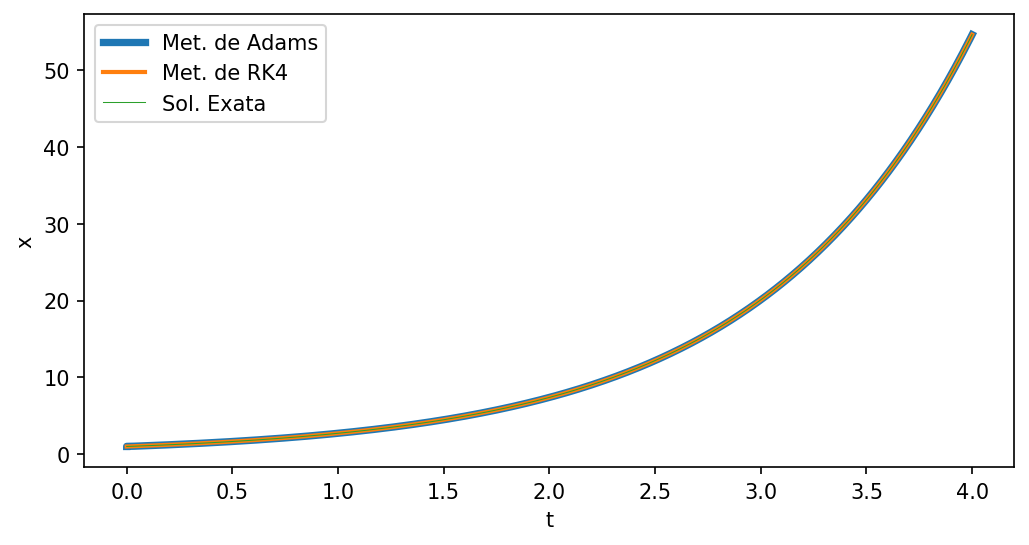

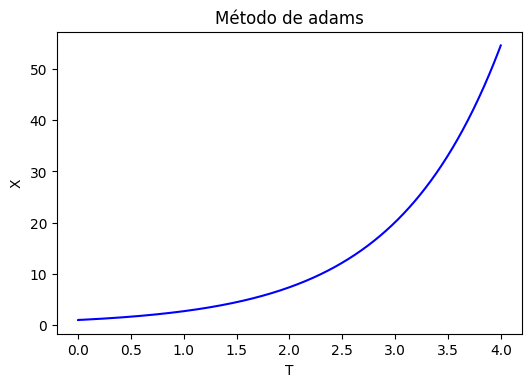

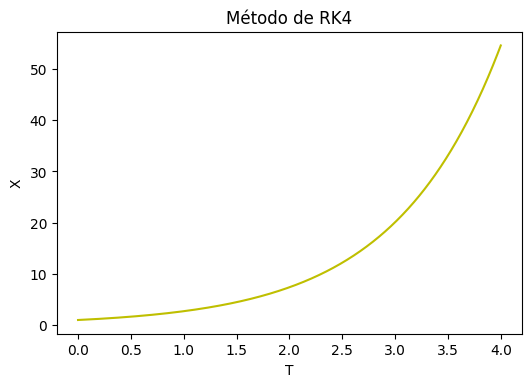

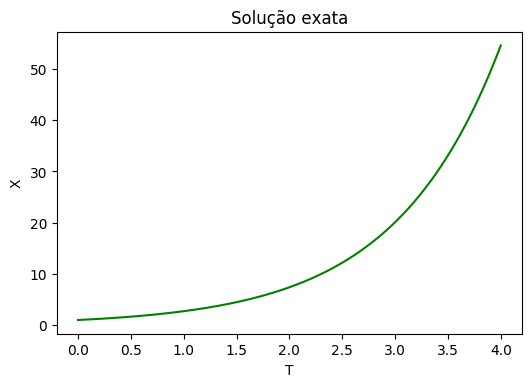

In [0]:
%matplotlib inline
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import pylab

def sol_exata(t0,tf,nt): #função que define a solução exata e^t
    import numpy as np
    from math import exp
    t = np.linspace(t0,tf,nt)
    x = np.zeros(nt)
    for i in np.arange(0,nt,1):
        x[i] = exp(t[i])
    return t,x

t0 = 0   # Valor inicial do intervalo 
tf = 4  # Valor final do intervalo
x0 = 1   # Condição inicial x(t0) = x0 
nt = 800  # número de pontos


data = pd.read_csv('Valida_Adams_csv_x_1&y_1&z_1.csv', delim_whitespace=True) # para mudar os dados do gráfico deve-se indicar o caminho que o arquivo .csv está no seu computador
data1 = pd.read_csv('Valida_RK4_csv_x_1&y_1&z_1.csv', delim_whitespace=True)

x_adams=data.x.tolist();t_adams=data.t.tolist()
x_rk4=data1.x.tolist();t_rk4=data1.t.tolist()

t, xe = sol_exata(t0,tf,nt)
largura = 8  # Largura da figura
altura  = 4  # Altura da figura
pylab.figure(figsize =(largura, altura),dpi=150)  
pylab.plot(t_adams, x_adams,linewidth=3.5,label='Met. de Adams',)
pylab.plot(t_rk4, x_rk4,linewidth=2.0 ,label='Met. de RK4')
pylab.plot(t, xe, linewidth=0.5,label='Sol. Exata')

pylab.xlabel('t') 
pylab.ylabel('x')
pylab.legend()


fig = plt.figure(dpi=100) ; fig2 = plt.figure(dpi=100) ; fig3 = plt.figure(dpi=100)
a1 = fig.gca() ; a2 = fig2.gca() ; a3 = fig3.gca()
a1.plot(t_adams, x_adams, 'b-',lw=1.5) ; a2.plot(t_rk4, x_rk4, 'y-',  lw=1.5) ;  a3.plot(t, xe,'g-', lw=1.5)
a1.set_title("Método de adams") ; a2.set_title("Método de RK4") ; a3.set_title("Solução exata")
a1.set_xlabel("T") ; a1.set_ylabel("X")
a2.set_xlabel("T") ; a2.set_ylabel("X")
a3.set_xlabel("T") ; a3.set_ylabel("X")
plt.savefig('Modelo_teste_e^t.pdf', format='pdf')
plt.show()
pylab.show()

Como visto no gráfico acima, não há quase que nenhuma distinção dos métodos para a solução exata o que indica que os métodos usados estão coerentes. 


obs: Foi usado um tamanho diferente nas linhas das 3 soluções, caso coloca-se um tamanho igual não haveria distinção alguma entre as linhas, devido a proximidade que estão as soluções númericas dos métodos para a solução exata.

# Exemplos de aplicação do código Principal

Compilando o código principal

In [0]:
!gfortran -Waliasing -pedantic -Wsurprising -Wunderflow -std=f2008 -o lorenz_out  src/precision.f95 src/lorenz_parameters.f95 src/runge_kutta.f95 src/adams.f95 src/main_lorenz.f95 

Iremos colocar as situações iniciais e o valor de "ρ" no primeiro input, lembrando que se queremos o método de Runge-kutta de 4 ordem temos que escrever "0" no arquivo de input, se queremos o método Adams-Bashforth-Moulton de 4 ordem temos que escrever "1" no arquivo de input. 

### Variamos o "ρ" pelo método de Runge-Kutta de 4°ordem

In [0]:
%%writefile Input_lorenz__rk4_1.inp
0 ! rk4
28.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__rk4_1.inp


In [0]:
%%writefile Input_lorenz__rk4_2.inp
0 ! rk4
100.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__rk4_2.inp


In [0]:
%%writefile Input_lorenz__rk4_3.inp
0 ! rk4
10.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__rk4_3.inp


In [0]:
%%writefile Input_lorenz__rk4_4.inp
0 ! rk4
25.9    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Overwriting Input_lorenz__rk4_4.inp


In [0]:
%%writefile Input_lorenz__rk4_5.inp
0 ! rk4
24.70    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Overwriting Input_lorenz__rk4_5.inp


In [0]:
%%writefile Input_lorenz__rk4_6.inp
0 ! rk4
5.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__rk4_6.inp


In [0]:
%%writefile Input_lorenz__rk4_7.inp
0 ! rk4
15.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Overwriting Input_lorenz__rk4_7.inp


### Vamos mudar as condições iniciais  pelo método RK4

In [0]:
%%writefile Input_lorenz__rk4_8.inp
0 ! rk4
28.0    !  ro 
8000 0.005  ! m, passos
1.5 5.0 10.0 0.0 ! x0 y0 z0 t0

Overwriting Input_lorenz__rk4_8.inp


In [0]:
%%writefile Input_lorenz__rk4_9.inp
0 ! rk4
24.0    !  ro 
8000 0.005  ! m, passos
1.5 5.0 10.0 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__rk4_9.inp


### Colocando um intervalo de tempo de 0 até 1000 com 200 mil iterações pelo método de RK4

In [0]:
%%writefile Input_lorenz__rk4_10.inp
0 ! rk4
28.0    !  ro 
200000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__rk4_10.inp


### Variamos o "ρ" pelo método de Adams-Bashforth-Moulton de 4°ordem

In [0]:
%%writefile Input_lorenz__adams_1.inp
1 ! adams
28.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_1.inp


In [0]:
%%writefile Input_lorenz__adams_2.inp
1 ! adams
100.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_2.inp


In [0]:
%%writefile Input_lorenz__adams_3.inp
1 ! adams
10.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_3.inp


In [0]:
%%writefile Input_lorenz__adams_4.inp
1 ! adams
25.9    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_4.inp


In [0]:
%%writefile Input_lorenz__adams_5.inp
1 ! adams
24.7    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Overwriting Input_lorenz__adams_5.inp


In [0]:
%%writefile Input_lorenz__adams_6.inp
1 ! adams
5.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_6.inp


In [0]:
%%writefile Input_lorenz__adams_7.inp
1 ! adams
15.0    !  ro 
8000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_7.inp


### Mudando as condições iniciais e analisando pelo método de Adams

In [0]:
%%writefile Input_lorenz__adams_8.inp
1 ! adams
28.0    !  ro 
8000 0.005  ! m, passos
1.5 5.0 10.0 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_8.inp


In [0]:
%%writefile Input_lorenz__adams_9.inp
1 ! adams
24.0    !  ro 
8000 0.005  ! m, passos
1.5 5.0 10.0 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_9.inp


### Colocando um intervalo de tempo de 0 até 1000 com 200 mil iterações pelo método de Adams

In [0]:
%%writefile Input_lorenz__adams_10.inp
1 ! adams
28.0    !  ro 
200000 0.005  ! m, passos
0.0 1.0 1.05 0.0 ! x0 y0 z0 t0

Writing Input_lorenz__adams_10.inp


#### Compilando o programa:

In [0]:
! echo "Input_lorenz__rk4_10\n RK4_x_0.0&y_1.0&z_1.05&ro_28&t_1000" | ./lorenz_out > lorenz_report.dat

In [0]:
! echo "Input_lorenz__adams_10\n ADAMS_x_1.5&y_5.0&z_10.0&ro_28&t_1000" | ./lorenz_out > lorenz_report.dat

# Gráficos do sistema de Lorenz 

Iremos agora importar nossos arquivos .csv para implementação dos gráficos. O código feito para o gráfico é em python e os gráficos foram gravados em ".pdf" para não perder a resolução quando se da zoom.

Obs: Os arquivos ".csv" que contém os dados dos métodos podem ser salvos em diferentes caminhos no computador do usuario desse notebook, logo caso queira mudar o arquivo de dados para testar os gráficos com outra base de dados, basta colocar o caminho onde o arquivo ".csv" se encontra na função pd.read.csv('caminho'). 

## Gráficos pelo método de Adams-Bashforth-Moulton de 4°ordem

### Gráficos 3D de sistemas caóticos e dos atratores de lorenz pelo método Adams-Bashforth-Moulton

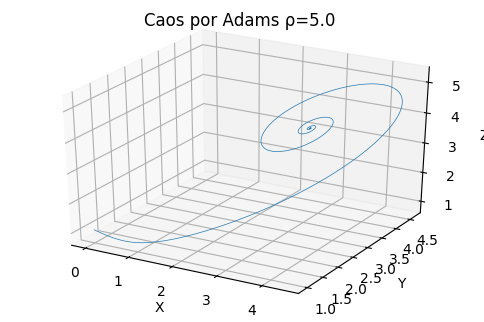

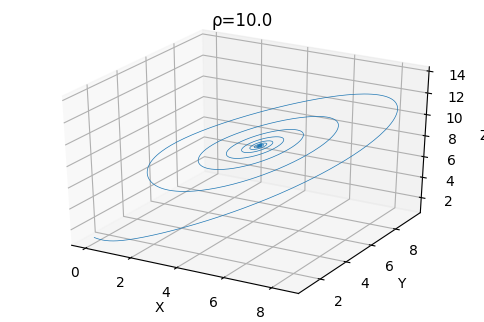

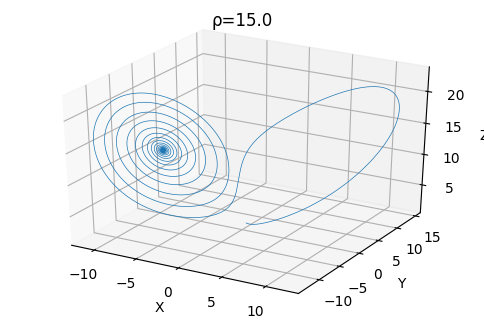

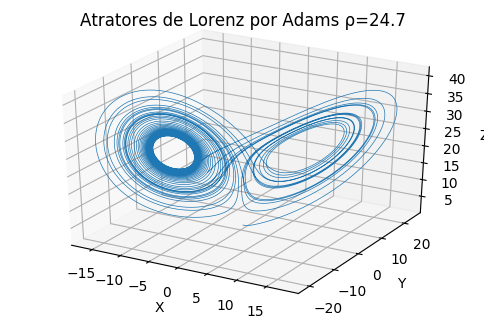

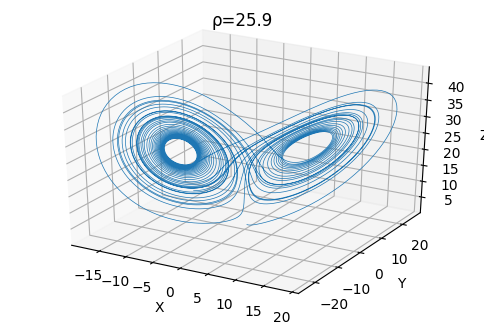

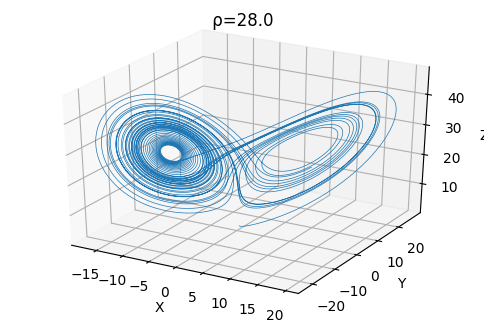

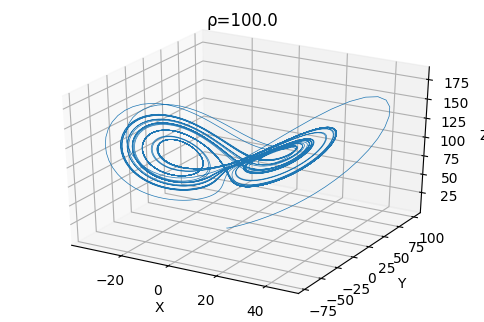

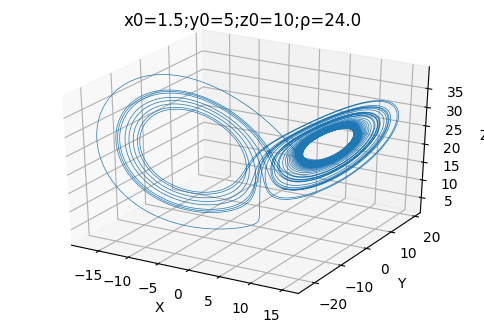

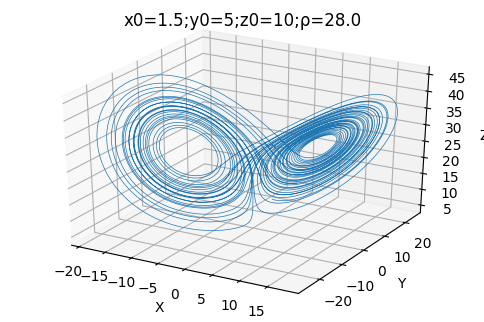

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('Lorenz_ADAMS_x_0.0&y_1.0&z_1.05&ro_5.0.csv', delim_whitespace=True)
data2 = pd.read_csv('Lorenz_ADAMS_x_0.0&y_1.0&z_1.05&ro_10.0.csv', delim_whitespace=True)
data3 = pd.read_csv('Lorenz_ADAMS_x_0.0&y_1.0&z_1.05&ro_15.0.csv', delim_whitespace=True)
data4 = pd.read_csv('Lorenz_ADAMS_x_0.0&y_1.0&z_1.05&ro_24.7.csv', delim_whitespace=True)
data5 = pd.read_csv('Lorenz_ADAMS_x_0.0&y_1.0&z_1.05&ro_25.9.csv', delim_whitespace=True)
data6 = pd.read_csv('Lorenz_ADAMS_x_0.0&y_1.0&z_1.05&ro_28.0.csv', delim_whitespace=True)
data7 = pd.read_csv('Lorenz_ADAMS_x_0.0&y_1.0&z_1.05&ro_100.0.csv', delim_whitespace=True)
data8 = pd.read_csv('Lorenz_ADAMS_x_1.5&y_5.0&z_10.0&ro_24.0.csv', delim_whitespace=True)
data9 = pd.read_csv('Lorenz_ADAMS_x_1.5&y_5.0&z_10.0&ro_28.0.csv', delim_whitespace=True)

x=data.x.tolist() ; y=data.y.tolist() ; z=data.z.tolist()
x2=data2.x.tolist() ; y2=data2.y.tolist() ; z2=data2.z.tolist()
x3=data3.x.tolist() ; y3=data3.y.tolist() ; z3=data3.z.tolist()
x4=data4.x.tolist() ; y4=data4.y.tolist() ; z4=data4.z.tolist()
x5=data5.x.tolist() ; y5=data5.y.tolist() ; z5=data5.z.tolist()
x6=data6.x.tolist() ; y6=data6.y.tolist() ; z6=data6.z.tolist()
x7=data7.x.tolist() ; y7=data7.y.tolist() ; z7=data7.z.tolist()
x8=data8.x.tolist() ; y8=data8.y.tolist() ; z8=data8.z.tolist()
x9=data9.x.tolist() ; y9=data9.y.tolist() ; z9=data9.z.tolist()

fig = plt.figure(dpi=100) ; fig2 = plt.figure(dpi=100) ; fig3 = plt.figure(dpi=100) ; fig4 = plt.figure(dpi=100) ; fig5 = plt.figure(dpi=100)
fig6 = plt.figure(dpi=100) ; fig7 = plt.figure(dpi=100) ; fig8 = plt.figure(dpi=100) ; fig9 = plt.figure(dpi=100) 

a1 = fig.gca(projection='3d') ; a2 = fig2.gca(projection='3d') ; a3 = fig3.gca(projection='3d') ; a4 = fig4.gca(projection='3d') ; a5 = fig5.gca(projection='3d')
a6 = fig6.gca(projection='3d') ; a7 = fig7.gca(projection='3d'); a8 = fig8.gca(projection='3d') ; a9 = fig9.gca(projection='3d')

a1.plot(x, y, z, lw=0.5) ; a2.plot(x2, y2, z2, lw=0.5) ; a3.plot(x3, y3, z3, lw=0.5) ; a4.plot(x4, y4, z4, lw=0.5) ; a5.plot(x5, y5, z5, lw=0.5)
a6.plot(x6, y6, z6, lw=0.5) ; a7.plot(x7, y7, z7, lw=0.5) ; a8.plot(x8, y8, z8, lw=0.5) ; a9.plot(x9, y9, z9, lw=0.5) 

a1.set_xlabel("X") ; a1.set_ylabel("Y") ; a1.set_zlabel("Z")
a2.set_xlabel("X") ; a2.set_ylabel("Y") ; a2.set_zlabel("Z")
a3.set_xlabel("X") ; a3.set_ylabel("Y") ; a3.set_zlabel("Z")
a4.set_xlabel("X") ; a4.set_ylabel("Y") ; a4.set_zlabel("Z")
a5.set_xlabel("X") ; a5.set_ylabel("Y") ; a5.set_zlabel("Z")
a6.set_xlabel("X") ; a6.set_ylabel("Y") ; a6.set_zlabel("Z")
a7.set_xlabel("X") ; a7.set_ylabel("Y") ; a7.set_zlabel("Z")
a8.set_xlabel("X") ; a8.set_ylabel("Y") ; a8.set_zlabel("Z")
a9.set_xlabel("X") ; a9.set_ylabel("Y") ; a9.set_zlabel("Z")

a1.set_title("Caos por Adams ρ=5.0 ") ; a2.set_title("ρ=10.0") ; a3.set_title("ρ=15.0") ; a4.set_title("Atratores de Lorenz por Adams ρ=24.7") ; a5.set_title("ρ=25.9")
a6.set_title(" ρ=28.0 ") ; a7.set_title("ρ=100.0") ; a8.set_title("x0=1.5;y0=5;z0=10;ρ=24.0") ; a9.set_title("x0=1.5;y0=5;z0=10;ρ=28.0") ; 


#plt.savefig('Atrator_metodo_adams_9.pdf', format='pdf')

plt.show()

### Gráfico 2D do Atrator de Lorenz ( A Borboleta de Lorenz )

Aqui iremos utilizar a solução númerica pelo método de ADAMS-BASHFORT-MOULTON com um tempo variando de 0 até 1000 e por 200 mil iterações. Percebemos como ficará o gráfico abaixo: 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


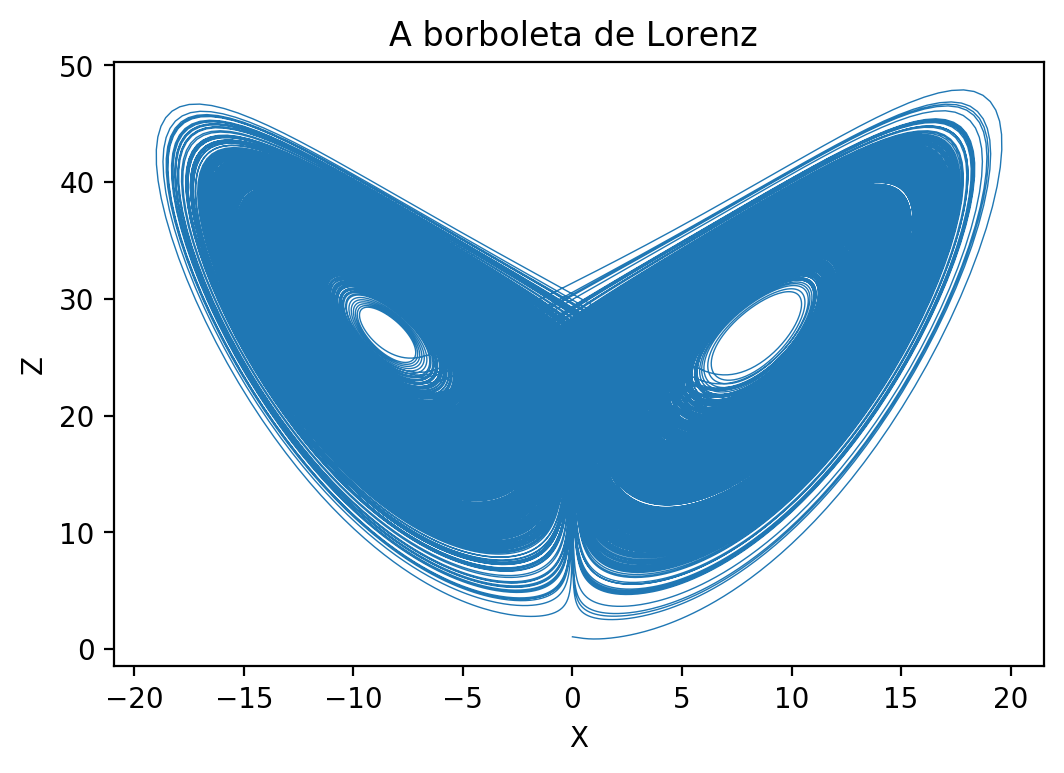

In [8]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# ro = 28.0
data = pd.read_csv('Lorenz_ADAMS_x_1.5&y_5.0&z_10.0&ro_28&t_1000.csv', delim_whitespace=True)
x=data.x.tolist() ; y=data.y.tolist() ; z=data.z.tolist()
fig = plt.figure(dpi=200)
a1 = fig.gca()
a1.plot(x, z, lw=0.5)
a1.set_title("A borboleta de Lorenz ")
a1.set_xlabel("X") ; a1.set_ylabel("Z")
#plt.savefig('_A_Borboleta_de_lorenz.pdf', format='pdf') #figura ja salva no arquivo enviado.
plt.show()


## Gráficos pelo método de Runge-Kutta de 4°ordem

### Gráficos 3D de sistemas caóticos e dos atratores de lorenz pelo método RK4

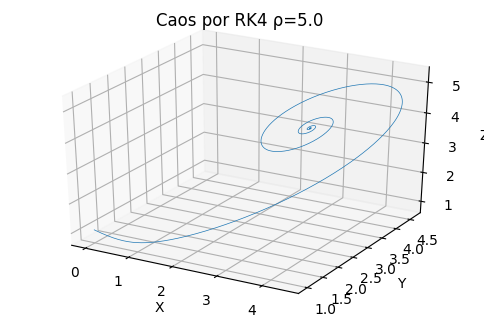

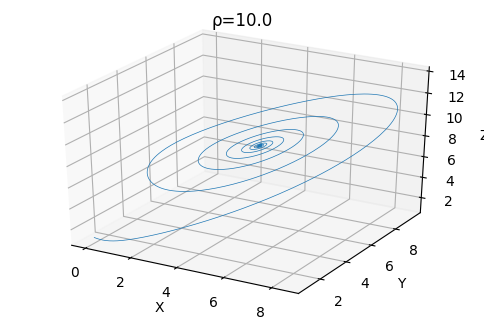

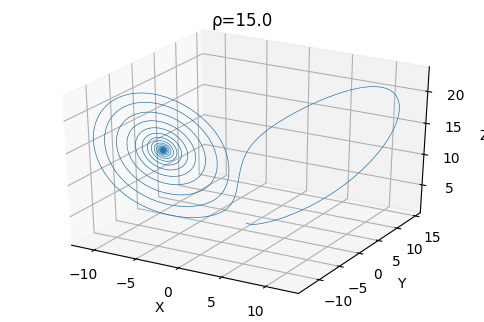

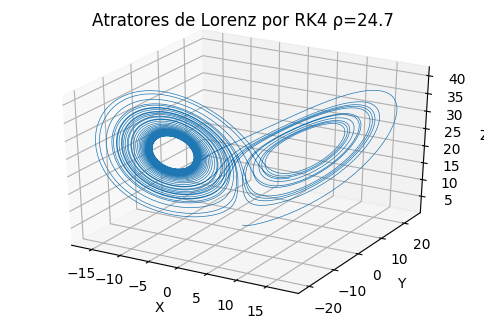

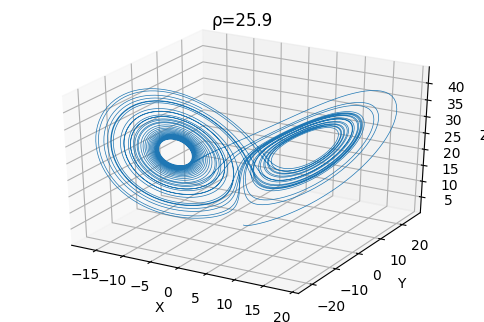

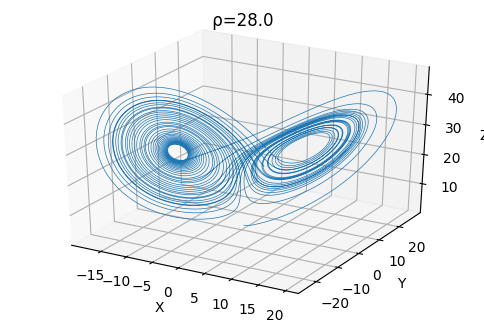

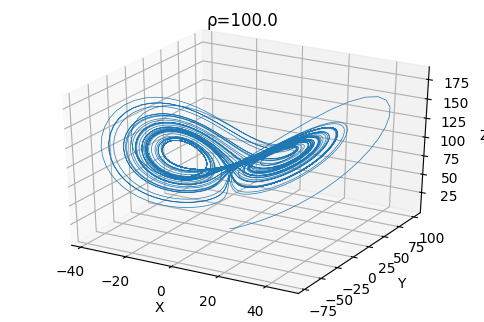

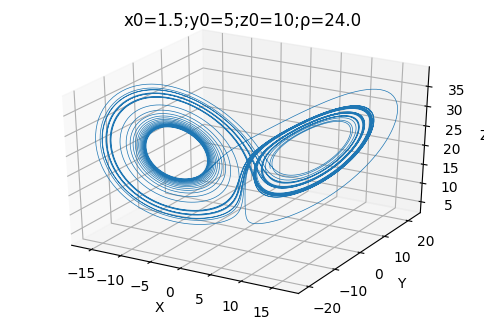

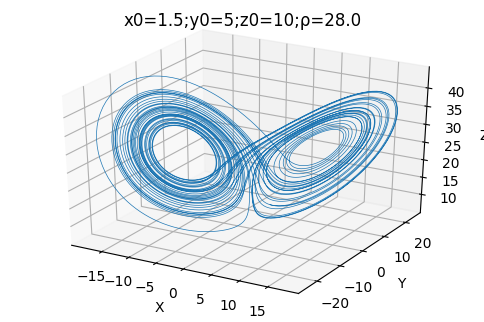

In [0]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

data = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_5.0.csv', delim_whitespace=True)
data2 = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_10.0.csv', delim_whitespace=True)
data3 = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_15.0.csv', delim_whitespace=True)
data4 = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_24.7.csv', delim_whitespace=True)
data5 = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_25.9.csv', delim_whitespace=True)
data6 = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_28.0.csv', delim_whitespace=True)
data7 = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_100.0.csv', delim_whitespace=True)
data8 = pd.read_csv('Lorenz_RK4_x_1.5&y_5.0&z_10.0&ro_24.0.csv', delim_whitespace=True)
data9 = pd.read_csv('Lorenz_RK4_x_1.5&y_5.0&z_10.0&ro_28.0.csv', delim_whitespace=True)

x=data.x.tolist() ; y=data.y.tolist() ; z=data.z.tolist()
x2=data2.x.tolist() ; y2=data2.y.tolist() ; z2=data2.z.tolist()
x3=data3.x.tolist() ; y3=data3.y.tolist() ; z3=data3.z.tolist()
x4=data4.x.tolist() ; y4=data4.y.tolist() ; z4=data4.z.tolist()
x5=data5.x.tolist() ; y5=data5.y.tolist() ; z5=data5.z.tolist()
x6=data6.x.tolist() ; y6=data6.y.tolist() ; z6=data6.z.tolist()
x7=data7.x.tolist() ; y7=data7.y.tolist() ; z7=data7.z.tolist()
x8=data8.x.tolist() ; y8=data8.y.tolist() ; z8=data8.z.tolist()
x9=data9.x.tolist() ; y9=data9.y.tolist() ; z9=data9.z.tolist()

fig = plt.figure(dpi=100) ; fig2 = plt.figure(dpi=100) ; fig3 = plt.figure(dpi=100) ; fig4 = plt.figure(dpi=100) ; fig5 = plt.figure(dpi=100)
fig6 = plt.figure(dpi=100) ; fig7 = plt.figure(dpi=100) ; fig8 = plt.figure(dpi=100) ; fig9 = plt.figure(dpi=100) 

a1 = fig.gca(projection='3d') ; a2 = fig2.gca(projection='3d') ; a3 = fig3.gca(projection='3d') ; a4 = fig4.gca(projection='3d') ;a5 = fig5.gca(projection='3d')
a6 = fig6.gca(projection='3d') ; a7 = fig7.gca(projection='3d') ; a8 = fig8.gca(projection='3d') ; a9 = fig9.gca(projection='3d')

a1.plot(x, y, z, lw=0.5) ; a2.plot(x2, y2, z2, lw=0.5) ; a3.plot(x3, y3, z3, lw=0.5) ; a4.plot(x4, y4, z4, lw=0.5) ; a5.plot(x5, y5, z5, lw=0.5)
a6.plot(x6, y6, z6, lw=0.5) ; a7.plot(x7, y7, z7, lw=0.5) ; a8.plot(x8, y8, z8, lw=0.5) ; a9.plot(x9, y9, z9, lw=0.5) 

a1.set_xlabel("X") ; a1.set_ylabel("Y") ; a1.set_zlabel("Z")
a2.set_xlabel("X") ; a2.set_ylabel("Y") ; a2.set_zlabel("Z")
a3.set_xlabel("X") ; a3.set_ylabel("Y") ; a3.set_zlabel("Z")
a4.set_xlabel("X") ; a4.set_ylabel("Y") ; a4.set_zlabel("Z")
a5.set_xlabel("X") ; a5.set_ylabel("Y") ; a5.set_zlabel("Z")
a6.set_xlabel("X") ; a6.set_ylabel("Y") ; a6.set_zlabel("Z")
a7.set_xlabel("X") ; a7.set_ylabel("Y") ; a7.set_zlabel("Z")
a8.set_xlabel("X") ; a8.set_ylabel("Y") ; a8.set_zlabel("Z")
a9.set_xlabel("X") ; a9.set_ylabel("Y") ; a9.set_zlabel("Z")

a1.set_title("Caos por RK4 ρ=5.0 ") ; a2.set_title("ρ=10.0") ; a3.set_title("ρ=15.0") ; a4.set_title("Atratores de Lorenz por RK4 ρ=24.7") ; a5.set_title("ρ=25.9")
a6.set_title(" ρ=28.0 ") ; a7.set_title("ρ=100.0") ; a8.set_title("x0=1.5;y0=5;z0=10;ρ=24.0") ; a9.set_title("x0=1.5;y0=5;z0=10;ρ=28.0") ; 

#plt.savefig('Atrator_metodo_RK4_9.pdf', format='pdf')
plt.show()

### Gráfico 2D do Atrator de Lorenz pelo método Runge-Kutta de 4°ordem

Assim como fizemos acima  pelo método de ADAMS-BASHFORT-MOULTON , aqui iremos utilizar a solução númerica pelo método de Runge-Kutta de 4°ordem com um tempo variando de 0 até 1000 e por 200 mil iterações. Percebemos como ficará o gráfico abaixo, é muito semelhante ao gráfico pelo método ADAMS-BASHFORT-MOULTON : 

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


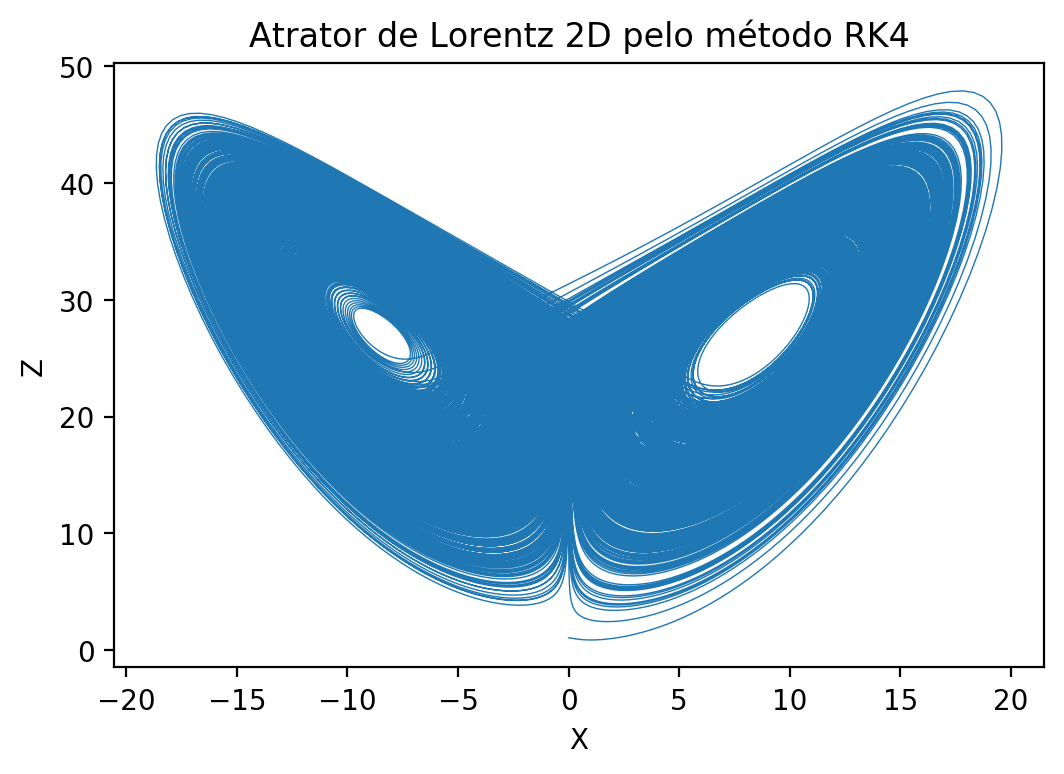

In [10]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

# ro = 100.0
data = pd.read_csv('Lorenz_RK4_x_0.0&y_1.0&z_1.05&ro_28&t_1000.csv', delim_whitespace=True)
x=data.x.tolist() ; y=data.y.tolist() ; z=data.z.tolist()
fig = plt.figure(dpi=200)
a1 = fig.gca()
a1.plot(x, z, lw=0.5)
a1.set_title("Atrator de Lorentz 2D pelo método RK4")
a1.set_xlabel("X") ; a1.set_ylabel("Z")
plt.savefig('Atrator_de_lorenz_2D_figura.pdf', format='pdf')
plt.show()

#Conclusão

 Os métodos numéricos de Runge-kutta de 4° ordem e Adams-Bashforth-Moulton de 4° ordem foram satisfatórios para demonstrar as soluções numéricas do sistema de equações diferenciais ordinárias de primeira ordem de Lorenz. Se analisarmos um sistema dinâmico linear (como o sistema teste) os dois métodos se apresentam com ótimas aproximações da solução exata e ambos tiveram um erro na ordem de 10^-5, entretanto quando analisamos as equações de Lorenz temos que os resultados dos métodos ao passar do tempo se tornam totalmente diferentes, pois o sitema é dinamico não linear, mesmo com soluções numéricas distintas os comportamentos dos gráficos são muito semelhantes. 

 Mesmo não se sabendo a solução analitica podemos representar os atratores de Lorenz assim como Lorenz fez em seu estudo realizado na década de 1960. Podemos observar que quando o número de Rayleigh "ρ" ultrapassa o valor de ρ=24,74 vemos o que é chamado de Atrator de Lorenz nos gráficos, observando que sempre tem dois núcleos bem separados, esse estudo de Lorenz ficou conhecido como efeito borboleta (no gráfico de quando ρ=28.0 por demonstrar semelhança com uma borboleta).

 Vale resssaltar que esse é um "modelo de brinquedo" termo usado quando Físicos tentam reduzir ao máximo um problema muito complexo, assim como aconteceu com Lorenz, pois o movimento da atmosfera é muito complexo, com isso ele reduziu o problema e resolveu as equações por um royal McBee lgp-30 (um dos primeiros computadores). Lorenz ficou conhecido como pioneiro para a Teoria do Caos e essa área é de grande estudo atualmente, sendo aplicada em finanças, biologia, quimica entre outras áreas.  


# Referências  bibliográficas 



- **[MODELAGEM MATEMÁTICA EM SISTEMAS DINÂMICOS: ANÁLISE DOS PARÂMETROS E RESOLUÇÃO NUMÉRICA PARA O ATRACTOR DE LORENZ](https://doity.com.br/media/doity/submissoes/artigo-63c52d7eabea47c9d44364b3651a49817dcf38b5-arquivo.pdf)**  
- **[DIFFERENCE EQUATION OF LORENZ SYSTEM](https://ijpam.eu/contents/2013-83-1/9/9.pdf)** 

- **[EQUAÇÕES DIFERENCIAIS ORDINÁRIAS (EDO) PROBLEMA DO VALOR INICIAL (PVI)](https://www.dca.ufrn.br/~meneghet/FTP/MCEC/Transp07.pdf)**
- **[DETERMINISTIC NONPERIODIC FLOW](https://journals.ametsoc.org/doi/pdf/10.1175/1520-0469%281963%29020%3C0130%3ADNF%3E2.0.CO%3B2)** 
- **[IMPLEMENTAÇÃO DOS MÉTODOS DE RUNGE-KUTTA,DORMAND-PRINCE E ADAMS-BASHFORT-MOULTON NA LINGUAGUEM DE PROGAMAÇÃO FORTRAN PARA SOLUÇÃO DE EQUAÇÕES DIFERENCIAIS ORDINÁRIAS](http://emed.mat.br/aceitesposteres/viliamcardoso.pdf)** 

